In [2]:
 # Import libraries and dependencies
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import matplotlib.pyplot as plt
%matplotlib inline



In [46]:
ticker = ''


In [47]:
end_date = datetime.now()
start_date = end_date + timedelta(-1825)

# Get 1 year's worth of historical data for AAPL
df = get_historical_data(ticker, start_date, end_date,  output_format='pandas')
df.tail()

,open,high,low,close,volume
date,,,,,
2019-09-11,118.03,119.45,117.55,119.39,193082
2019-09-12,119.70,120.03,118.85,119.44,173027
2019-09-13,119.89,120.30,119.33,119.40,241840
2019-09-16,118.83,119.77,118.55,119.51,148505
2019-09-17,119.32,119.58,118.87,119.58,268380


In [5]:
 # Use the `drop` function with the `level` parameter to drop extra columns in the multi-index DataFrame
df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
df.head()


,close
date,
2014-09-19,184.86
2014-09-22,182.56
2014-09-23,181.53
2014-09-24,182.99
2014-09-25,180.05


,close
date,
2014-09-19,NaN
2014-09-22,-0.012442
2014-09-23,-0.005642
2014-09-24,0.008043
2014-09-25,-0.016066
...,...
2019-09-11,0.007193
2019-09-12,0.002936
2019-09-13,-0.000253


close    0.000074
dtype: float64

In [44]:
  
def mcs_brownian (df, num_simulations):
# Monte Carlo Simulation with Geometric Brownian Motion
# simulated_price = previous_day_price * exp((daily_returns_mean - ((daily_std_mean**2)/2)) + (daily_std_mean * random_noise ))
    
    daily_returns= df.pct_change()
    daily_return_mean = daily_returns.mean()['close']
    variance = daily_returns.var()['close']
    daily_std = daily_returns.std()['close']
    simulations = num_simulations
    trading_days = 252 * 2
    df_last_price = df['close'][-1]
      
    
    simulated_price_df = pd.DataFrame()
    portfolio_cumulative_returns = pd.DataFrame()
    
    for n in range(simulations):
        
        simulated_prices = [df_last_price]
        
        for i in range (trading_days):
                      
            
            daily_drift = daily_return_mean - (variance/2)
            drift = daily_drift - ((daily_std ** 2) / 2)
            diffusion = daily_std * np.random.normal()
            simulated_price = simulated_prices[-1] * np.exp(drift + diffusion)
            simulated_prices.append(simulated_price)
            
        
        simulated_price_df = pd.Series(simulated_prices)
        simulated_daily_returns = simulated_price_df.pct_change()

        portfolio_cumulative_returns[n] = (1 + simulated_daily_returns.fillna(0)).cumprod()
    return portfolio_cumulative_returns
    

In [45]:
simulated_df = mcs_brownian(df,1000)

In [35]:
simulated_df.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015158,1.012235,0.986244,1.003527,0.989851,1.005211,0.999664,0.991839,0.996655,0.992496,...,0.999527,0.988117,1.009099,0.996034,0.992182,1.001677,1.010758,1.006829,1.000567,1.002874
2,1.019387,1.010264,0.978440,1.018375,0.979214,1.018352,0.992102,1.004454,0.987418,0.985411,...,1.016419,0.987404,1.021015,0.984535,0.995029,1.013573,1.000953,1.007940,1.007821,1.006656
3,1.008490,1.015631,0.971735,1.018977,0.972525,1.025145,0.995363,1.010006,0.995942,0.975699,...,1.012290,0.987091,1.013067,0.978858,1.002371,1.007340,0.999320,0.994557,0.999452,1.001966
4,1.014611,1.019682,0.977393,1.031818,0.979202,1.031742,0.989642,1.015034,1.004879,0.957226,...,1.028657,0.985226,1.010045,0.977957,1.011781,1.004257,0.980717,1.003874,0.977802,1.007823


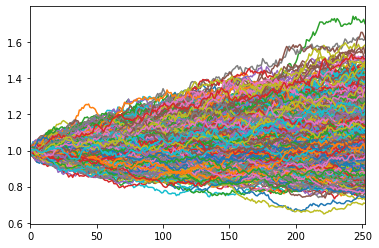

In [36]:
simulated_df.plot(legend=None)

In [42]:
ending_returns_simulated_df = simulated_df.iloc[-1, :]
ending_returns_simulated_df.head()

0    1.130852
1    1.152041
2    1.346987
3    1.052701
4    1.138172
Name: 504, dtype: float64

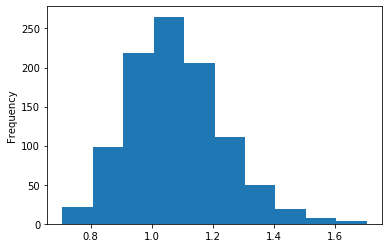

In [38]:
ending_returns_simulated_df.plot(kind='hist', bins=10)

In [43]:
confidence_interval = ending_returns_simulated_df.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.793146
0.975    1.657319
Name: 504, dtype: float64

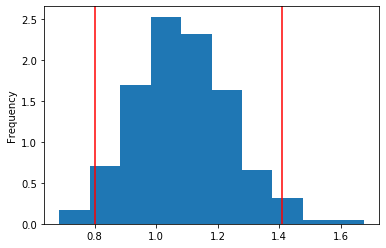

In [23]:
plt.figure();
ending_returns_simulated_df.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')